## Data Preprocessing 

In [1]:
#Import the library
import pandas as pd

#Read the file
school = pd.ExcelFile('SchoolProfile.xlsx')

#display the sheet names
school.sheet_names

['Data Dictionary', 'School Profile']

In [2]:
#read the hub existence dataset 
hubexistence = pd.read_csv('SchoolProfileHub2016.csv')
hubexistence.head()

,Calendar Year,AGE ID,School Name,Suburb,State,Postcode,School Sector,School Type,Campus Type,Rolled Reporting Description,...,Total Enrolments,Girls Enrolments,Boys Enrolments,Full Time Equivalent Enrolments,Indigenous Enrolments (%),Language Background Other Than English (%),Address,Latitude,Longitudes,HubExistance
0,2016,28858,Staines Memorial College,Redbank Plains,QLD,4301,Independent,Combined,School Single Entity,Individual Reporting,...,442,211,231,441.5,4.0,5,"Staines Memorial College, Redbank Plains, QLD,...",{'results': [{'address_components': [{'long_na...,152.850765,y
1,2016,8571,Bass Hill Public School,Bass Hill,NSW,2197,Government,Primary,School Single Entity,Individual Reporting,...,354,168,186,354.0,3.0,82,"Bass Hill Public School, Bass Hill, NSW, 2197",{'results': [{'address_components': [{'long_na...,151.006027,y
2,2016,8551,Bossley Park Public School,Bossley Park,NSW,2176,Government,Primary,School Single Entity,Individual Reporting,...,413,205,208,413.0,1.0,82,"Bossley Park Public School, Bossley Park, NSW,...",{'results': [{'address_components': [{'long_na...,150.883108,y
3,2016,8158,Fairfield West Public School,Fairfield West,NSW,2165,Government,Primary,School Single Entity,Individual Reporting,...,732,358,374,732.0,1.0,90,"Fairfield West Public School, Fairfield West, ...",{'results': [{'address_components': [{'long_na...,150.924731,y
4,2016,7793,Granville Public School,Granville,NSW,2142,Government,Primary,School Single Entity,Individual Reporting,...,569,270,299,569.0,1.0,91,"Granville Public School, Granville, NSW, 2142",{'results': [{'address_components': [{'long_na...,151.004982,y


In [3]:
#import necessary libraries

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [4]:
#store the data into different data frames

SchoolProfile = pd.read_excel(school, 'School Profile')


In [5]:
#check the dimension

print(SchoolProfile.shape)


(9535, 31)


In [6]:
#check the columns

#print(SchoolProfile.dtypes)


In [7]:
#select relevant features to combine

SchoolProfileMDL=SchoolProfile.iloc[:,[3,4,5,7,8,15,16,17,18,21,25,29,30]]


In [8]:
#check the head
SchoolProfileMDL.head()

,School Name,Suburb,State,School Sector,School Type,Geolocation,ICSEA,Bottom SEA Quarter (%),Lower Middle SEA Quarter (%),Teaching Staff,Total Enrolments,Indigenous Enrolments (%),Language Background Other Than English (%)
0,Corpus Christi Catholic School,Bellerive,TAS,Catholic,Primary,Inner Regional,1080.0,6,25,29,380,2,3
1,Fahan School,Sandy Bay,TAS,Independent,Combined,Inner Regional,1135.0,3,10,41,390,1,7
2,Geneva Christian College,Latrobe,TAS,Independent,Combined,Outer Regional,976.0,37,35,23,208,6,5
3,Holy Rosary Catholic School,Claremont,TAS,Catholic,Primary,Inner Regional,981.0,33,40,28,399,5,1
4,Immaculate Heart of Mary Catholic School,Lenah Valley,TAS,Catholic,Primary,Inner Regional,1015.0,24,29,15,200,11,15


In [9]:
#print categorical variables
print("School Sector")
print(SchoolProfileMDL["School Sector"].value_counts())

print("School Type")
print(SchoolProfileMDL["School Type"].value_counts())

print("Geolocation")
print(SchoolProfileMDL["Geolocation"].value_counts())

School Sector
Government     6702
Catholic       1696
Independent    1137
Name: School Sector, dtype: int64
School Type
Primary      6225
Secondary    1460
Combined     1350
Special       500
Name: School Type, dtype: int64
Geolocation
Major Cities      5083
Inner Regional    2342
Outer Regional    1497
Remote             316
Very Remote        297
Name: Geolocation, dtype: int64


In [10]:
#change type of categorical variables

SchoolProfileMDL["School Sector"] = SchoolProfileMDL["School Sector"].astype('category')
SchoolProfileMDL["School Type"] = SchoolProfileMDL["School Type"].astype('category')
SchoolProfileMDL["Geolocation"] = SchoolProfileMDL["Geolocation"].astype('category')


C:\Users\Rishabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Rishabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Rishabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [11]:
SchoolProfileMDL.dtypes

School Name                                     object
Suburb                                          object
State                                           object
School Sector                                 category
School Type                                   category
Geolocation                                   category
ICSEA                                          float64
Bottom SEA Quarter (%)                           int64
Lower Middle SEA Quarter (%)                     int64
Teaching Staff                                   int64
Total Enrolments                                 int64
Indigenous Enrolments (%)                        int64
Language Background Other Than English (%)       int64
dtype: object

In [12]:
#convert to numerical value

SchoolProfileMDL["School Sector_cat"] = SchoolProfileMDL["School Sector"].cat.codes
SchoolProfileMDL["School Type_cat"] = SchoolProfileMDL["School Type"].cat.codes
SchoolProfileMDL["Geolocation_cat"] = SchoolProfileMDL["Geolocation"].cat.codes

#create acolum by adding sea scores(25 and 50)

SchoolProfileMDL['SEA50%'] = SchoolProfileMDL['Bottom SEA Quarter (%)'] + SchoolProfileMDL['Lower Middle SEA Quarter (%)']

C:\Users\Rishabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Rishabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Rishabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [13]:
SchoolProfileMDL.dtypes

School Name                                     object
Suburb                                          object
State                                           object
School Sector                                 category
School Type                                   category
Geolocation                                   category
ICSEA                                          float64
Bottom SEA Quarter (%)                           int64
Lower Middle SEA Quarter (%)                     int64
Teaching Staff                                   int64
Total Enrolments                                 int64
Indigenous Enrolments (%)                        int64
Language Background Other Than English (%)       int64
School Sector_cat                                 int8
School Type_cat                                   int8
Geolocation_cat                                   int8
SEA50%                                           int64
dtype: object

In [14]:
#select appropriate columns
SchoolProfileMDL=SchoolProfileMDL.iloc[:,[0,1,2,3,4,5,6,9,10,11,12,13,14,15,16]]
SchoolProfileMDL.head()


,School Name,Suburb,State,School Sector,School Type,Geolocation,ICSEA,Teaching Staff,Total Enrolments,Indigenous Enrolments (%),Language Background Other Than English (%),School Sector_cat,School Type_cat,Geolocation_cat,SEA50%
0,Corpus Christi Catholic School,Bellerive,TAS,Catholic,Primary,Inner Regional,1080.0,29,380,2,3,0,1,0,31
1,Fahan School,Sandy Bay,TAS,Independent,Combined,Inner Regional,1135.0,41,390,1,7,2,0,0,13
2,Geneva Christian College,Latrobe,TAS,Independent,Combined,Outer Regional,976.0,23,208,6,5,2,0,2,72
3,Holy Rosary Catholic School,Claremont,TAS,Catholic,Primary,Inner Regional,981.0,28,399,5,1,0,1,0,73
4,Immaculate Heart of Mary Catholic School,Lenah Valley,TAS,Catholic,Primary,Inner Regional,1015.0,15,200,11,15,0,1,0,53


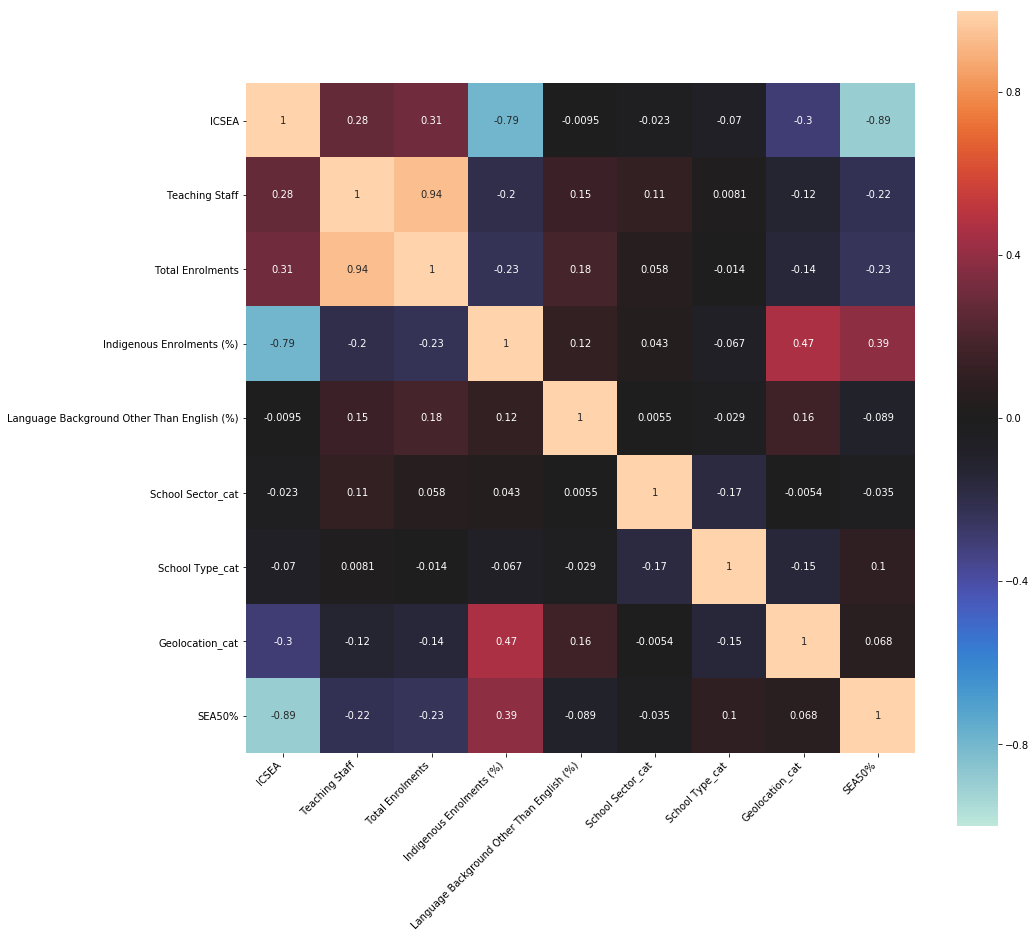

In [15]:
#check the correlation

import seaborn as sns
corr = SchoolProfileMDL.corr()
plt.figure(figsize=(15,15))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    
    square=True,annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#total enrollments abd teaching staff are highly correlated (0.94)
#removing one

In [16]:
SchoolProfileMDL1=SchoolProfileMDL.iloc[:,[0,1,2,3,4,5,6,7,9,10,11,12,13,14]]
SchoolProfileMDL1.head()


,School Name,Suburb,State,School Sector,School Type,Geolocation,ICSEA,Teaching Staff,Indigenous Enrolments (%),Language Background Other Than English (%),School Sector_cat,School Type_cat,Geolocation_cat,SEA50%
0,Corpus Christi Catholic School,Bellerive,TAS,Catholic,Primary,Inner Regional,1080.0,29,2,3,0,1,0,31
1,Fahan School,Sandy Bay,TAS,Independent,Combined,Inner Regional,1135.0,41,1,7,2,0,0,13
2,Geneva Christian College,Latrobe,TAS,Independent,Combined,Outer Regional,976.0,23,6,5,2,0,2,72
3,Holy Rosary Catholic School,Claremont,TAS,Catholic,Primary,Inner Regional,981.0,28,5,1,0,1,0,73
4,Immaculate Heart of Mary Catholic School,Lenah Valley,TAS,Catholic,Primary,Inner Regional,1015.0,15,11,15,0,1,0,53


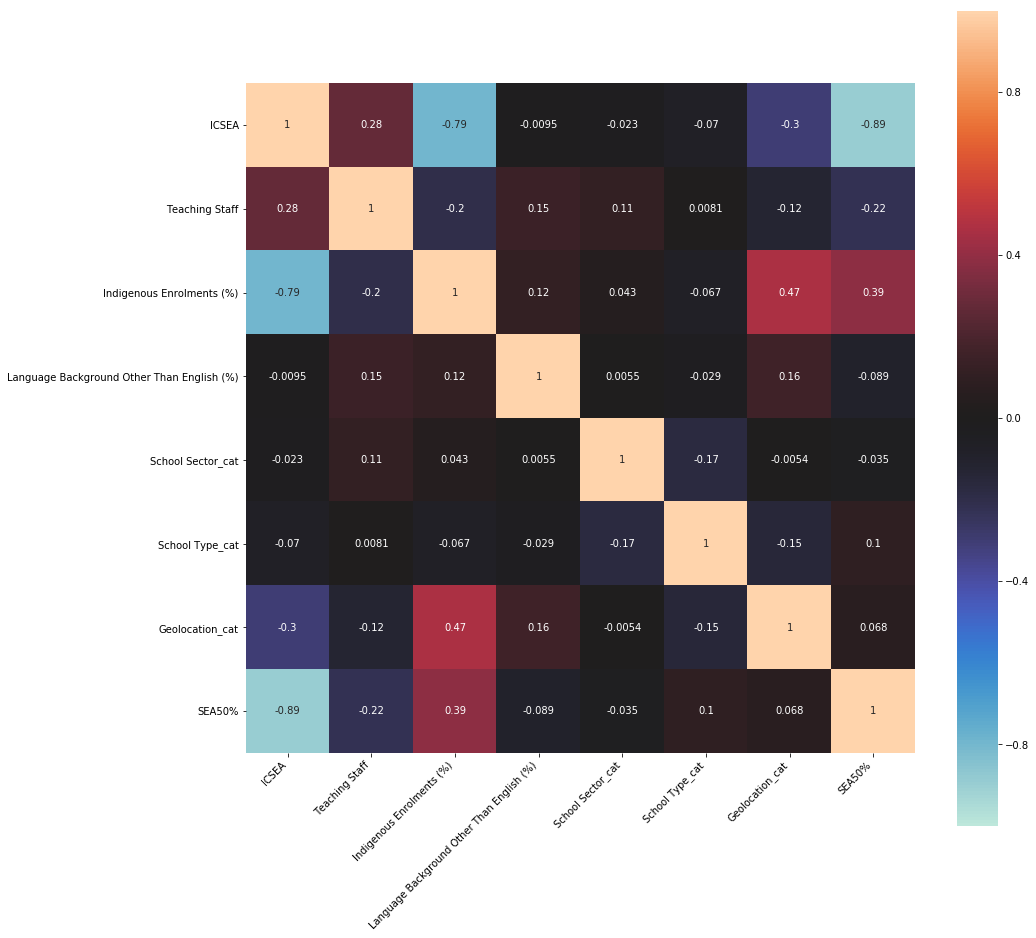

In [17]:
#check the correlation after removing total enrollments

corr = SchoolProfileMDL1.corr()
plt.figure(figsize=(15,15))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    square=True,annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
#looks fine

In [18]:
#check the sahpe
SchoolProfileMDL.shape

(9535, 15)

# K means clustering

In [19]:
#take the relevant data fields for clustering algorithm 
cluster=SchoolProfileMDL.iloc[:,[6,7,9,10,11,12,13]]
cluster.head()
cluster.shape

(9535, 7)

In [20]:
# print(cluster.isna().sum()).isnull().sum() # Checks for null Values, Returns Boolean Array

In [21]:
# #check na values and remove 
# print(SchoolProfileMDL.isna().sum()).isnull().sum() # Checks for null Values, Returns Boolean Array

In [22]:
#drop null values in ICSEA 
cluster=cluster.dropna()
SchoolProfileMDL=SchoolProfileMDL.dropna()

In [23]:
cluster.isna().sum()## Checks for NA Values, Returns Boolean Array

ICSEA                                         0
Teaching Staff                                0
Indigenous Enrolments (%)                     0
Language Background Other Than English (%)    0
School Sector_cat                             0
School Type_cat                               0
Geolocation_cat                               0
dtype: int64

In [24]:
#transform data
mms = MinMaxScaler()
mms.fit(cluster)
data_transformed = mms.transform(cluster)

C:\Users\Rishabh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [25]:
#Optimum value of K

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

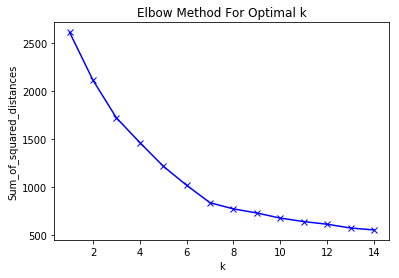

In [26]:
#Elbow method to find optimal value of K 

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
#K=7

Number Of Clusters:
2
Silhouette score value
0.28232474245295724
Number Of Clusters:
3
Silhouette score value
0.2899810123644243
Number Of Clusters:
4
Silhouette score value
0.3218520863057695
Number Of Clusters:
5
Silhouette score value
0.33781322905678735
Number Of Clusters:
6
Silhouette score value
0.34879343083052305
Number Of Clusters:
7
Silhouette score value
0.3653493116897706
Number Of Clusters:
8
Silhouette score value
0.3260917080496236
Number Of Clusters:
9
Silhouette score value
0.32872840777935414
Number Of Clusters:
10
Silhouette score value
0.3421164490221074
Number Of Clusters:
11
Silhouette score value
0.3463180067133705
Number Of Clusters:
12
Silhouette score value
0.3403996477117213
Number Of Clusters:
13
Silhouette score value
0.3592303160484449
Number Of Clusters:
14
Silhouette score value
0.36329908859928417


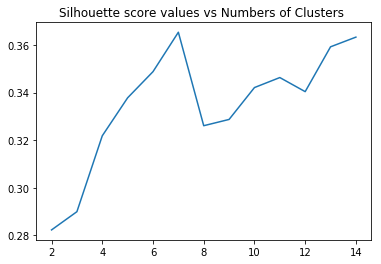

Optimal number of components is:
7


In [27]:
#Silhouette score value 

from sklearn import cluster
import numpy as numpy
import sklearn
import matplotlib.pyplot as plt


#obs = numpy.concatenate( (numpy.random.randn(100, 2) , 20 + numpy.random.randn(300, 2) , -15+numpy.random.randn(200, 2)))
obs=data_transformed
silhouette_score_values=list()

NumberOfClusters=range(2,15)

for i in NumberOfClusters:
    
    classifier=cluster.KMeans(i,init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True)
    classifier.fit(obs)
    labels= classifier.predict(obs)
    print ("Number Of Clusters:")
    print (i)
    print ("Silhouette score value")
    print (sklearn.metrics.silhouette_score(obs,labels ,metric='euclidean', sample_size=None, random_state=None))
    silhouette_score_values.append(sklearn.metrics.silhouette_score(obs,labels ,metric='euclidean', sample_size=None, random_state=None))

plt.plot(NumberOfClusters, silhouette_score_values)
plt.title("Silhouette score values vs Numbers of Clusters ")
plt.show()

Optimal_NumberOf_Components=NumberOfClusters[silhouette_score_values.index(max(silhouette_score_values))]
print ("Optimal number of components is:")
print (Optimal_NumberOf_Components)


In [28]:
#!pip install yellowbrick

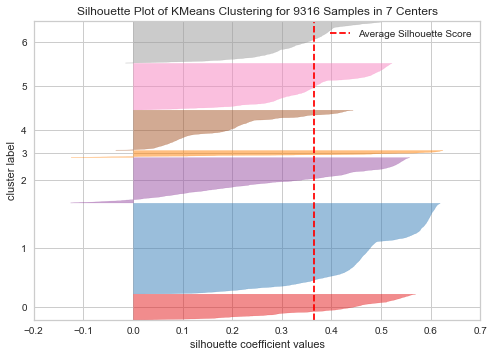

In [29]:
#Silhouette Visualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
model = SilhouetteVisualizer(KMeans(7))
model.fit(data_transformed)
model.show()

In [30]:
#silhoutte scoreof each cluster
import sklearn.metrics as metrics

num_clusters = 7
cluster_labels = km.labels_
sample_silhouette_values = metrics.silhouette_samples(data_transformed, cluster_labels)

means_lst = []
for label in range(num_clusters):
    means_lst.append(sample_silhouette_values[cluster_labels == label].mean())

In [31]:
means_lst

[0.6721681923724591,
 0.24779843997980203,
 0.49965678097486044,
 0.30559016492838376,
 0.3976686715286542,
 0.25496453776800254,
 0.5142051142153929]

In [32]:
#perform kmeans
km = KMeans(n_clusters=7,max_iter=200,random_state=111)
km.fit(data_transformed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=111, tol=0.0001, verbose=0)

In [33]:
#print the cluster center co-ordinates
print(km.cluster_centers_)

[[ 7.70430568e-01  9.40680227e-02  3.14476458e-02  6.93253689e-01
   4.76106817e-01  3.86273132e-01  2.51932537e-01]
 [ 7.95309465e-01  8.30560626e-02  3.46338125e-02  1.61341547e-01
  -1.05471187e-14  3.72119553e-01  2.23990418e-01]
 [ 6.98525456e-01  3.14161053e-02  1.56415963e-01  6.61320031e-02
   4.86569455e-01  2.74750576e-01  5.86531082e-01]
 [ 8.17015805e-01  1.40846920e-01  2.95191122e-02  1.82971640e-01
   1.00000000e+00  6.82285245e-02  2.10850801e-01]
 [ 7.21751446e-01  1.19040779e-01  1.01909308e-01  1.51121718e-01
   5.36197295e-01  7.70087510e-01  2.22354813e-01]
 [ 7.47033372e-01  5.47408578e-02  7.67369161e-02  1.20670882e-01
   5.00351247e-01  3.22678843e-01  1.28995434e-01]
 [ 4.44410840e-01  3.09687608e-02  9.03177570e-01  7.07990654e-01
   4.85981308e-01  1.79127726e-01  8.72663551e-01]]


In [34]:
#find out the cluster labels
cluster_labels = km.labels_
#store it as data frame 
cluster_labels=pd.DataFrame(cluster_labels)
SchoolProfileMDLkmeans=SchoolProfileMDL.copy()
SchoolProfileMDLkmeans['CLUSTER']=cluster_labels

# Profiling

In [35]:
#print clusterwise counts
print("cluster")
print(SchoolProfileMDLkmeans["CLUSTER"].value_counts())

cluster
5.0    2799
1.0    1445
0.0    1389
2.0    1286
4.0    1226
3.0     780
6.0     210
Name: CLUSTER, dtype: int64


C:\Users\Rishabh\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


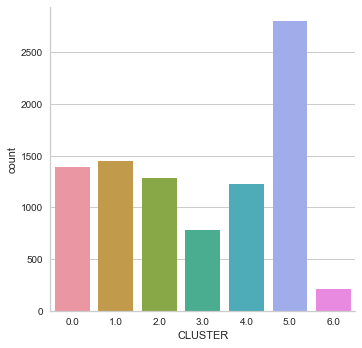

In [36]:
#plot the clusters back to data
import seaborn as sb
sb.factorplot(data=SchoolProfileMDLkmeans,x='CLUSTER',kind='count')

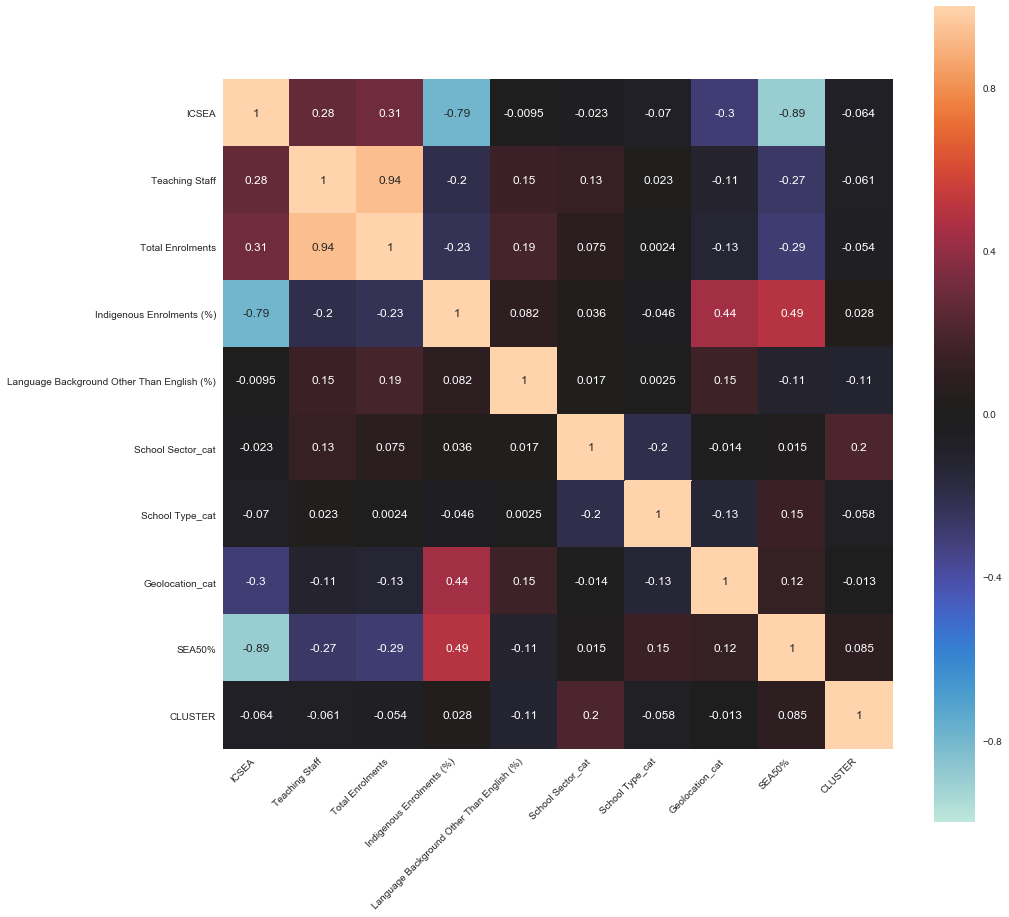

In [37]:
import seaborn as sns
corr = SchoolProfileMDLkmeans.corr()
plt.figure(figsize=(15,15))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    square=True,annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


In [38]:
#split data by cluster
Cluster0 = SchoolProfileMDLkmeans[SchoolProfileMDLkmeans['CLUSTER']==0]
Cluster1 = SchoolProfileMDLkmeans[SchoolProfileMDLkmeans['CLUSTER']==1]
Cluster2 = SchoolProfileMDLkmeans[SchoolProfileMDLkmeans['CLUSTER']==2]
Cluster3 = SchoolProfileMDLkmeans[SchoolProfileMDLkmeans['CLUSTER']==3]
Cluster4 = SchoolProfileMDLkmeans[SchoolProfileMDLkmeans['CLUSTER']==4]
Cluster5 = SchoolProfileMDLkmeans[SchoolProfileMDLkmeans['CLUSTER']==5]
Cluster6 = SchoolProfileMDLkmeans[SchoolProfileMDLkmeans['CLUSTER']==6]

In [39]:
Cluster0=Cluster0.iloc[:,[6,7,9,10,11,12,13]]
Cluster1=Cluster1.iloc[:,[6,7,9,10,11,12,13]]
Cluster2=Cluster2.iloc[:,[6,7,9,10,11,12,13]]
Cluster3=Cluster3.iloc[:,[6,7,9,10,11,12,13]]
Cluster4=Cluster4.iloc[:,[6,7,9,10,11,12,13]]
Cluster5=Cluster5.iloc[:,[6,7,9,10,11,12,13]]
Cluster6=Cluster6.iloc[:,[6,7,9,10,11,12,13]]


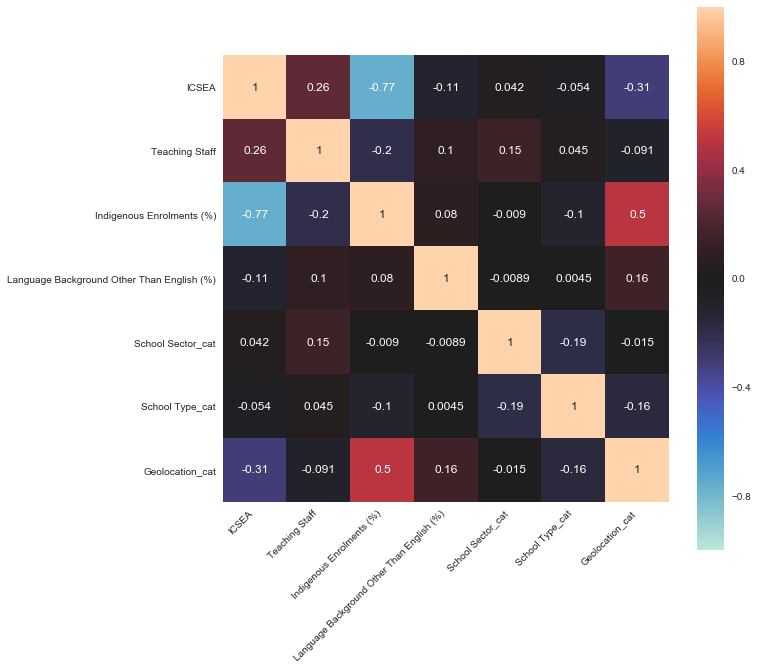

In [40]:
corr = Cluster0.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    square=True,annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


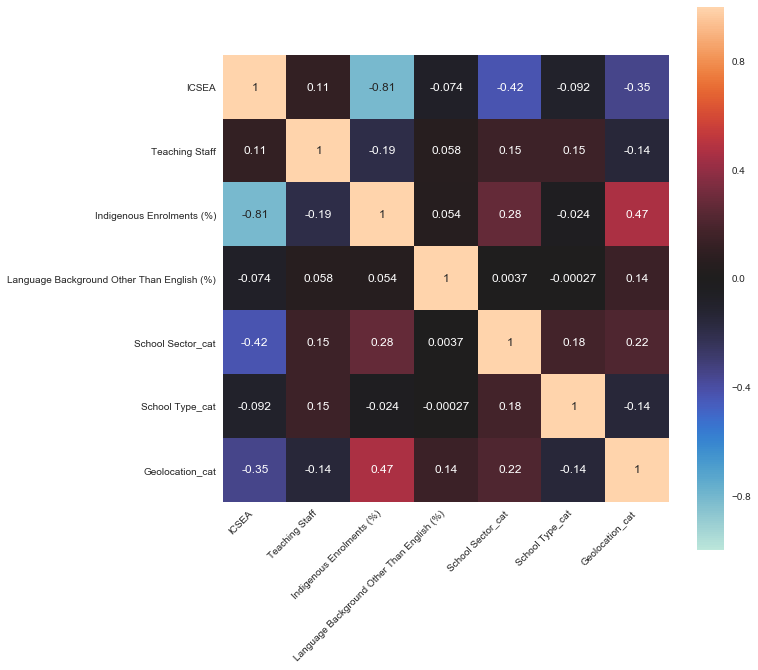

In [41]:
corr = Cluster1.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    square=True,annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


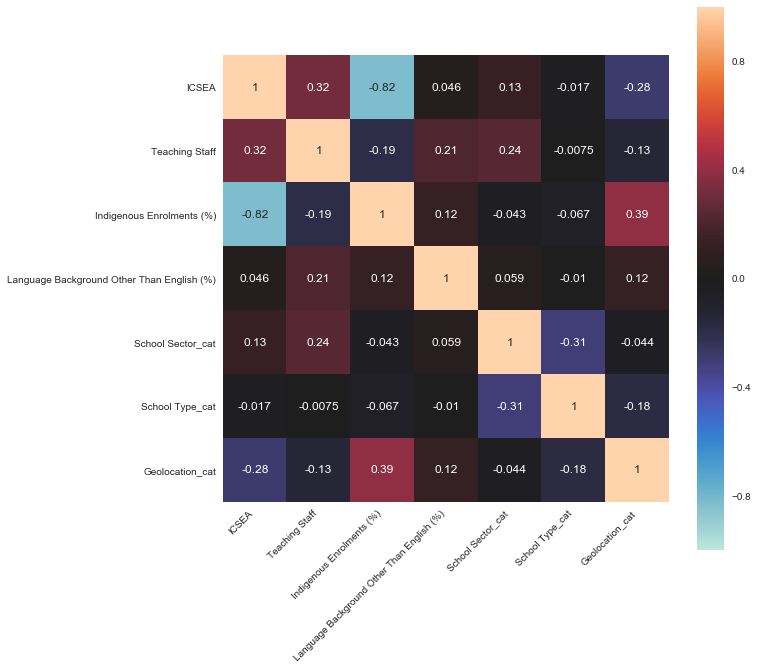

In [42]:
corr = Cluster2.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    square=True,annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


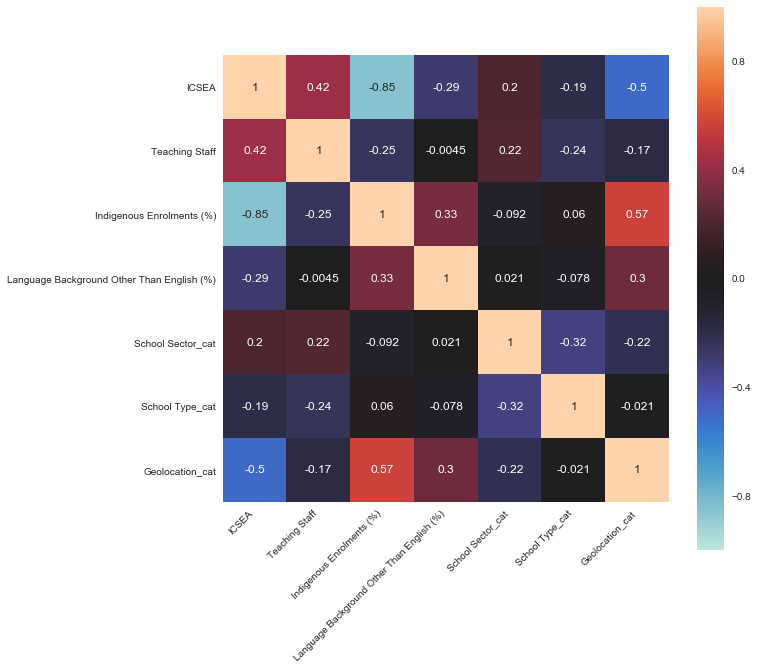

In [43]:
corr = Cluster3.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    square=True,annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


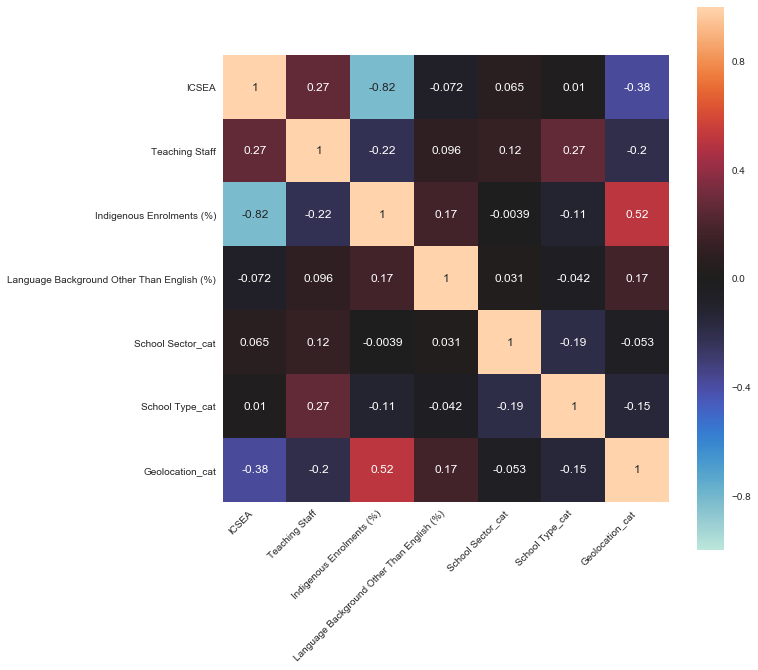

In [44]:
corr = Cluster4.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    square=True,annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


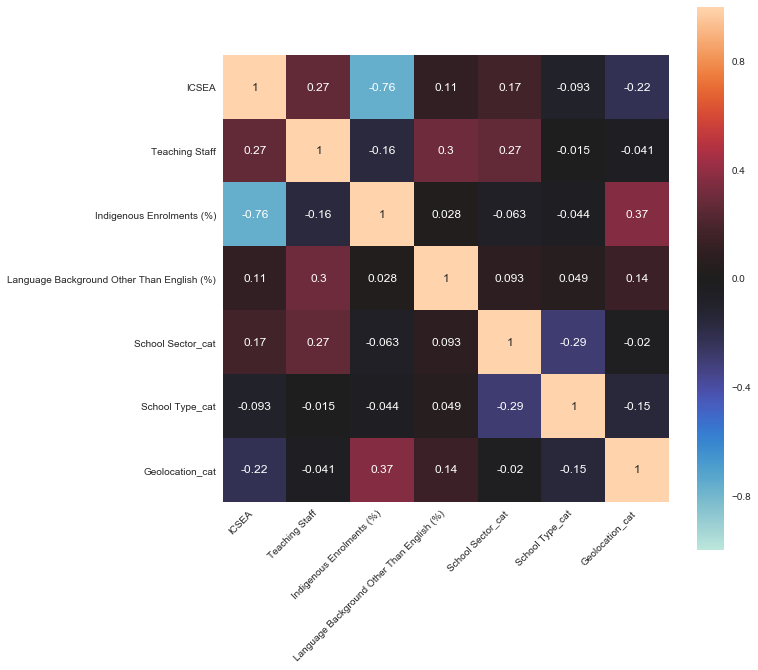

In [45]:
corr = Cluster5.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    square=True,annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


In [46]:
# Merge the dataframes into another dataframe based on PERSONID and Badge_ID
DataCombinedkmeans = pd.merge(SchoolProfileMDLkmeans, hubexistence, how='outer', on=['School Name', 'Suburb','State'])

C:\Users\Rishabh\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


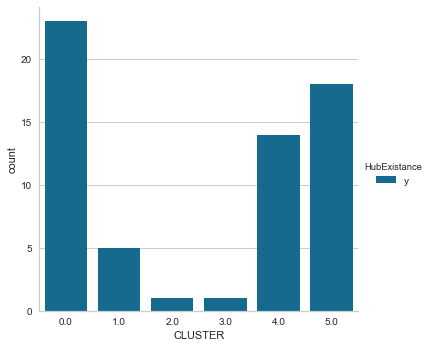

In [47]:
#plot the clusters back to data
import seaborn as sb
DataCombinedyes=DataCombinedkmeans[DataCombinedkmeans["HubExistance"]=="y"]
sb.factorplot(data=DataCombinedyes,x='CLUSTER',hue="HubExistance",kind='count')

# AGGLOMARATIVE CLUSTERING 

In [48]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [49]:

cluster=SchoolProfileMDL.iloc[:,[6,7,9,10,11,12,13]]
cluster.head()

,ICSEA,Teaching Staff,Indigenous Enrolments (%),Language Background Other Than English (%),School Sector_cat,School Type_cat,Geolocation_cat
0,1080.0,29,2,3,0,1,0
1,1135.0,41,1,7,2,0,0
2,976.0,23,6,5,2,0,2
3,981.0,28,5,1,0,1,0
4,1015.0,15,11,15,0,1,0


In [50]:
#transform data
mms = MinMaxScaler()
mms.fit(cluster)
data_transformed = mms.transform(cluster)

C:\Users\Rishabh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


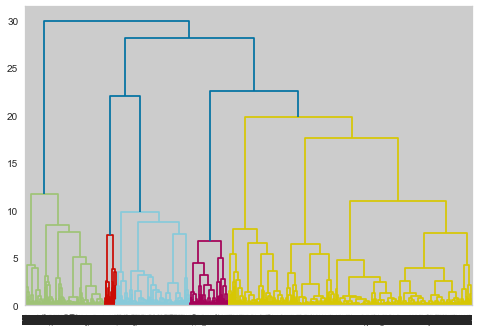

In [51]:
dendrogram = sch.dendrogram(sch.linkage(data_transformed, method='ward'))

In [52]:
#check the type of dendrogram
type(dendrogram)

dict

In [53]:
#perform clustering
model = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
model.fit(cluster)
labels = model.labels_


In [54]:
#print labels
print(labels)

[4 4 6 ... 4 2 4]


In [55]:
import numpy as np
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [56]:
#find out the cluster labels
cluster_labels_h = labels
#store it as data frame 
cluster_labels_h=pd.DataFrame(cluster_labels_h)
SchoolProfileMDLhierarchical=SchoolProfileMDL.copy()
SchoolProfileMDLhierarchical['CLUSTER']=cluster_labels_h

In [57]:
#check the sample 
SchoolProfileMDLhierarchical.head()

,School Name,Suburb,State,School Sector,School Type,Geolocation,ICSEA,Teaching Staff,Total Enrolments,Indigenous Enrolments (%),Language Background Other Than English (%),School Sector_cat,School Type_cat,Geolocation_cat,SEA50%,CLUSTER
0,Corpus Christi Catholic School,Bellerive,TAS,Catholic,Primary,Inner Regional,1080.0,29,380,2,3,0,1,0,31,4.0
1,Fahan School,Sandy Bay,TAS,Independent,Combined,Inner Regional,1135.0,41,390,1,7,2,0,0,13,4.0
2,Geneva Christian College,Latrobe,TAS,Independent,Combined,Outer Regional,976.0,23,208,6,5,2,0,2,72,6.0
3,Holy Rosary Catholic School,Claremont,TAS,Catholic,Primary,Inner Regional,981.0,28,399,5,1,0,1,0,73,6.0
4,Immaculate Heart of Mary Catholic School,Lenah Valley,TAS,Catholic,Primary,Inner Regional,1015.0,15,200,11,15,0,1,0,53,5.0


In [58]:
#print clusterwise counts
print("cluster")
print(SchoolProfileMDLhierarchical["CLUSTER"].value_counts())

cluster
6.0    1995
5.0    1716
4.0    1711
0.0    1651
1.0     962
3.0     894
2.0     206
Name: CLUSTER, dtype: int64


In [59]:
# Merge the dataframes into another dataframe based on PERSONID and Badge_ID
DataCombinedhierarchical = pd.merge(SchoolProfileMDLhierarchical, hubexistence, how='outer', on=['School Name', 'Suburb','State'])


In [60]:
DataCombinedhierarchical.head()

,School Name,Suburb,State,School Sector_x,School Type_x,Geolocation_x,ICSEA_x,Teaching Staff_x,Total Enrolments_x,Indigenous Enrolments (%)_x,...,Total Enrolments_y,Girls Enrolments,Boys Enrolments,Full Time Equivalent Enrolments,Indigenous Enrolments (%)_y,Language Background Other Than English (%)_y,Address,Latitude,Longitudes,HubExistance
0,Corpus Christi Catholic School,Bellerive,TAS,Catholic,Primary,Inner Regional,1080.0,29,380,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fahan School,Sandy Bay,TAS,Independent,Combined,Inner Regional,1135.0,41,390,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Geneva Christian College,Latrobe,TAS,Independent,Combined,Outer Regional,976.0,23,208,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Holy Rosary Catholic School,Claremont,TAS,Catholic,Primary,Inner Regional,981.0,28,399,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Immaculate Heart of Mary Catholic School,Lenah Valley,TAS,Catholic,Primary,Inner Regional,1015.0,15,200,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
#replavce nan valuesto no in hub existence
DataCombinedhierarchical["HubExistance"].fillna("No", inplace = True) 

In [62]:
#print the combined sheet
print(DataCombinedhierarchical["HubExistance"].value_counts())

No    9254
y       62
Name: HubExistance, dtype: int64


In [63]:
DataCombinedhierarchical.shape

(9316, 45)

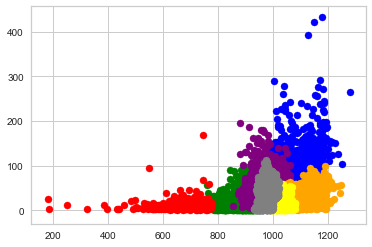

In [64]:
#plot cluster
X = cluster.values

%matplotlib inline
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.scatter(X[labels==5, 0], X[labels==5, 1], s=50, marker='o', color='yellow')
plt.scatter(X[labels==6, 0], X[labels==6, 1], s=50, marker='o', color='grey')
plt.xlabel
plt.show()

# profiling

C:\Users\Rishabh\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


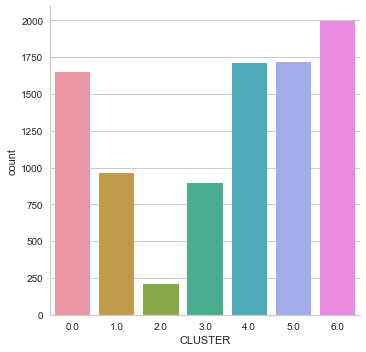

In [65]:
#plot the clusters back to data
import seaborn as sb
sb.factorplot(data=DataCombinedhierarchical,x='CLUSTER',kind='count')

C:\Users\Rishabh\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


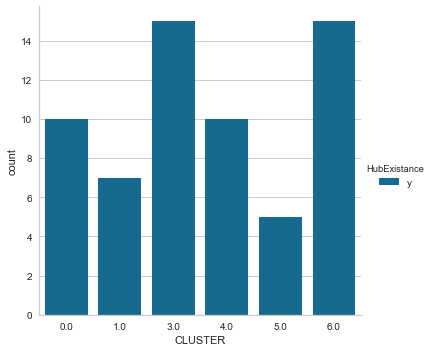

In [66]:
#plot the clusters back to data
import seaborn as sb
DataCombinedyes=DataCombinedhierarchical[DataCombinedhierarchical["HubExistance"]=="y"]
sb.factorplot(data=DataCombinedyes,x='CLUSTER',hue="HubExistance",kind='count')

In [67]:
#split data by cluster
Cluster0 = SchoolProfileMDLhierarchical[SchoolProfileMDLhierarchical['CLUSTER']==0]
Cluster1 = SchoolProfileMDLhierarchical[SchoolProfileMDLhierarchical['CLUSTER']==1]
Cluster2 = SchoolProfileMDLhierarchical[SchoolProfileMDLhierarchical['CLUSTER']==2]
Cluster3 = SchoolProfileMDLhierarchical[SchoolProfileMDLhierarchical['CLUSTER']==3]
Cluster4 = SchoolProfileMDLhierarchical[SchoolProfileMDLhierarchical['CLUSTER']==4]
Cluster5 = SchoolProfileMDLhierarchical[SchoolProfileMDLhierarchical['CLUSTER']==5]
Cluster6 = SchoolProfileMDLhierarchical[SchoolProfileMDLhierarchical['CLUSTER']==6]

In [68]:
Cluster0=Cluster0.iloc[:,[6,7,9,10,11,12,13]]
Cluster1=Cluster1.iloc[:,[6,7,9,10,11,12,13]]
Cluster2=Cluster2.iloc[:,[6,7,9,10,11,12,13]]
Cluster3=Cluster3.iloc[:,[6,7,9,10,11,12,13]]
Cluster4=Cluster4.iloc[:,[6,7,9,10,11,12,13]]
Cluster5=Cluster5.iloc[:,[6,7,9,10,11,12,13]]
Cluster6=Cluster6.iloc[:,[6,7,9,10,11,12,13]]

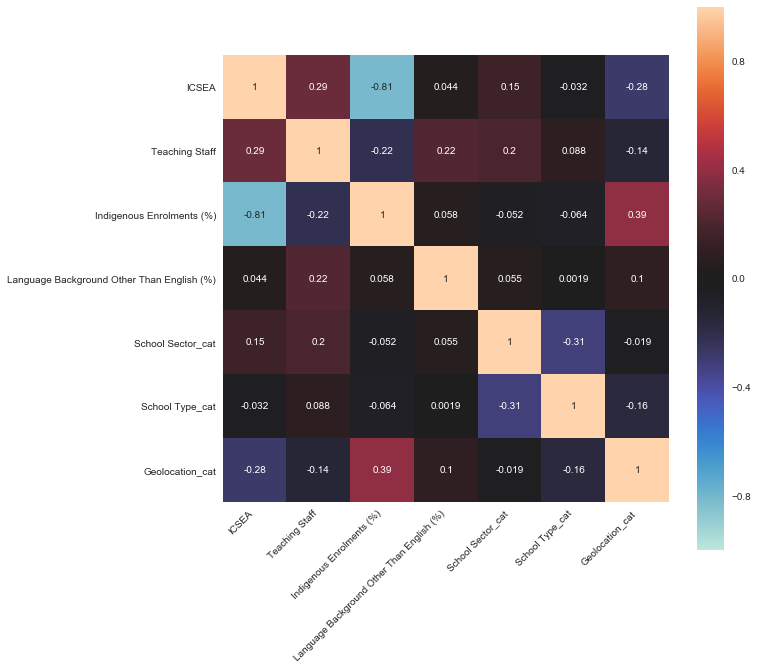

In [69]:
corr = Cluster0.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    square=True,annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


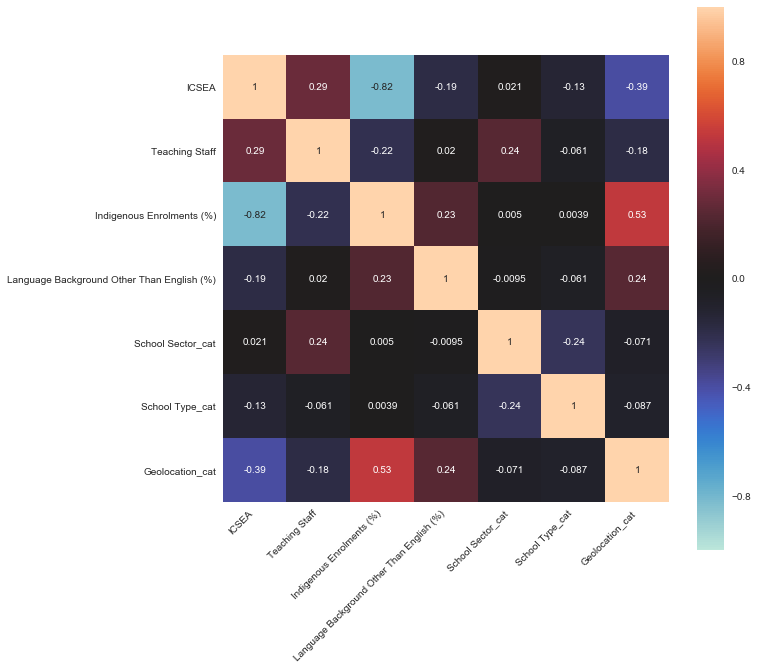

In [70]:
corr = Cluster1.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    square=True,annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


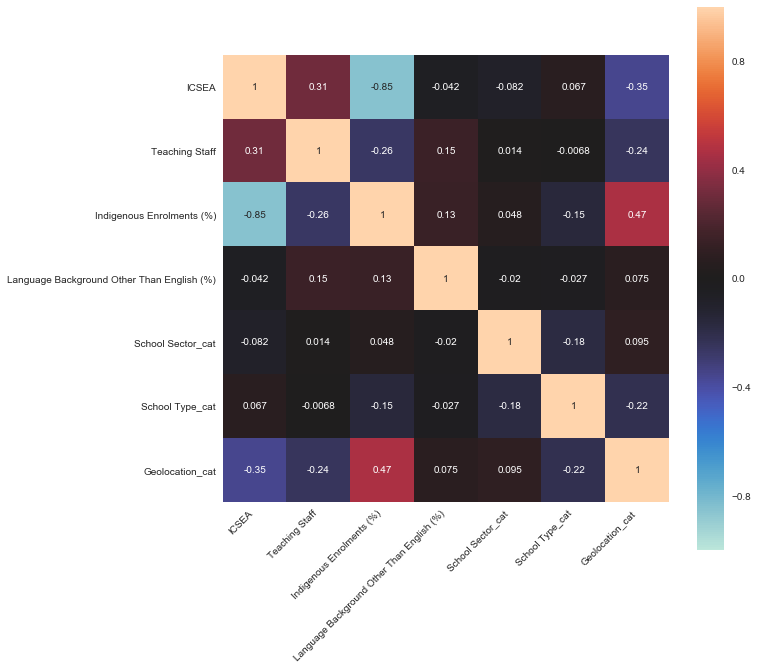

In [71]:
corr = Cluster2.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    square=True,annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


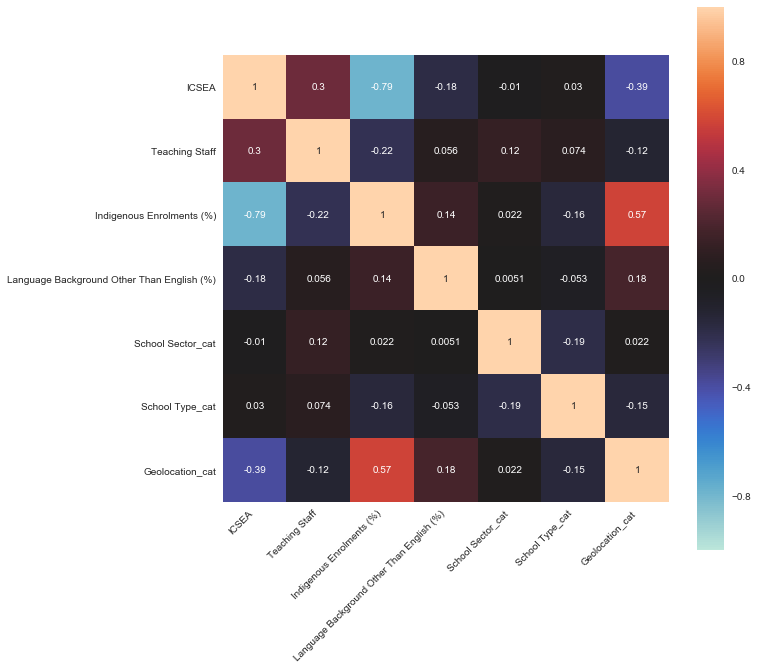

In [72]:
corr = Cluster3.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    square=True,annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


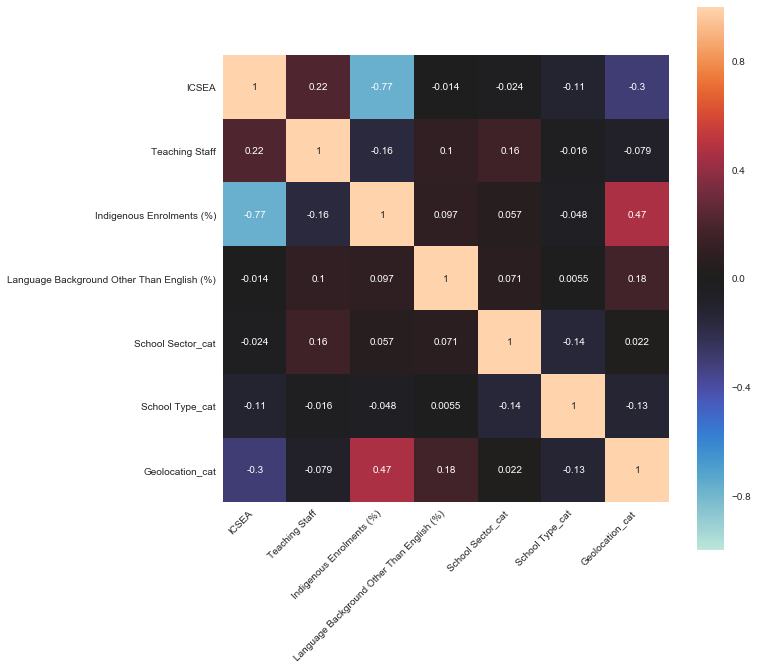

In [73]:
corr = Cluster4.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    square=True,annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


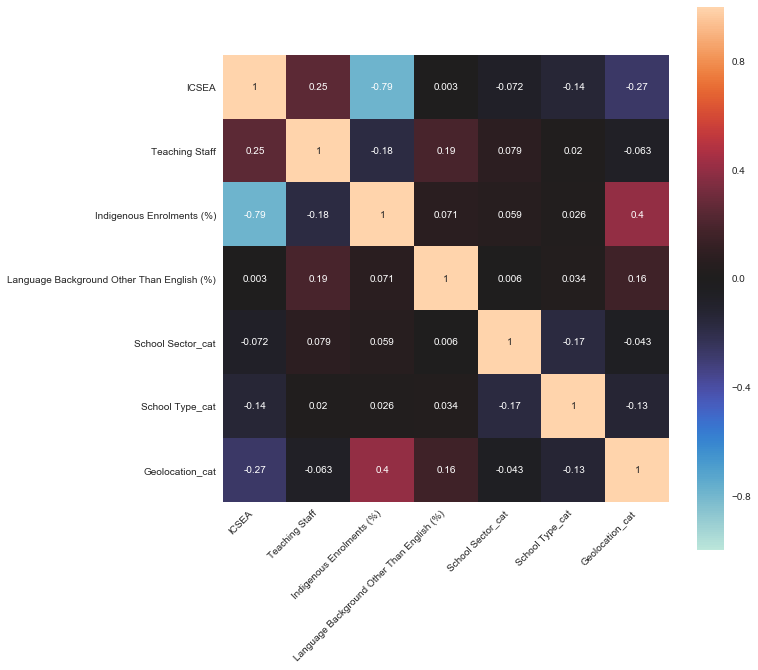

In [74]:
corr = Cluster5.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    square=True,annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


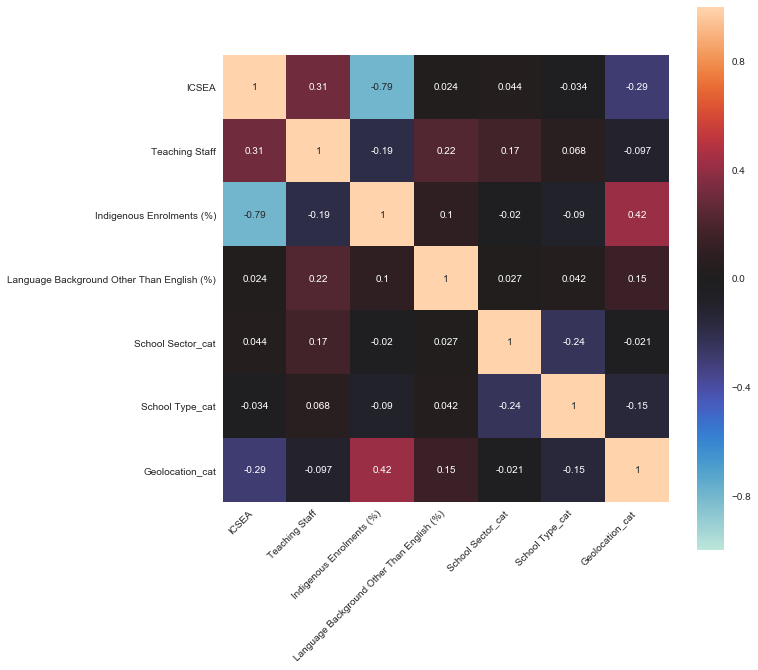

In [75]:
corr = Cluster6.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    square=True,annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
